In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [80]:
# ตั้งค่า seed สำหรับการสุ่ม
np.random.seed(42)

In [144]:
df = pd.read_csv("balanced_cheese_family2.csv")

### Data Analysis

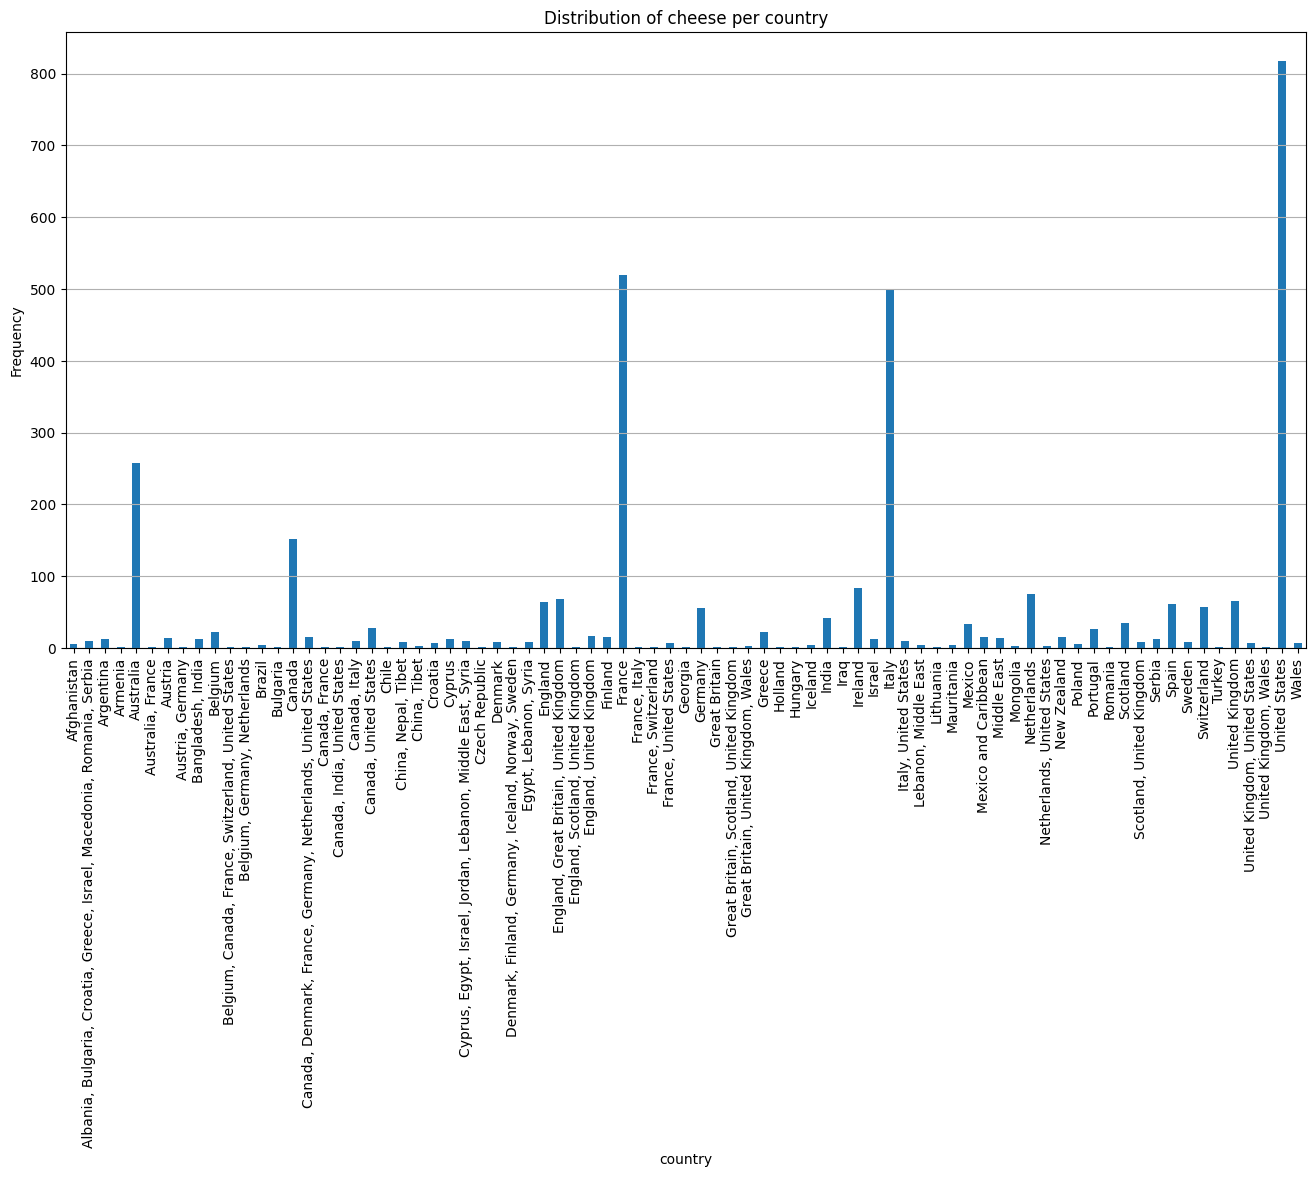

In [145]:
# การกระจายของ cheese ของแต่ละประเทศ

Freq = df["country"].value_counts().sort_index() \
          .plot(kind = "bar", title = "Distribution of cheese per country", figsize = (16, 8))
 
Freq.set_xlabel("country")
Freq.set_ylabel("Frequency")
plt.grid(True, axis='y')
plt.show()

C:\Users\TUF GAMING F15\AppData\Local\Temp\ipykernel_19884\914096921.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




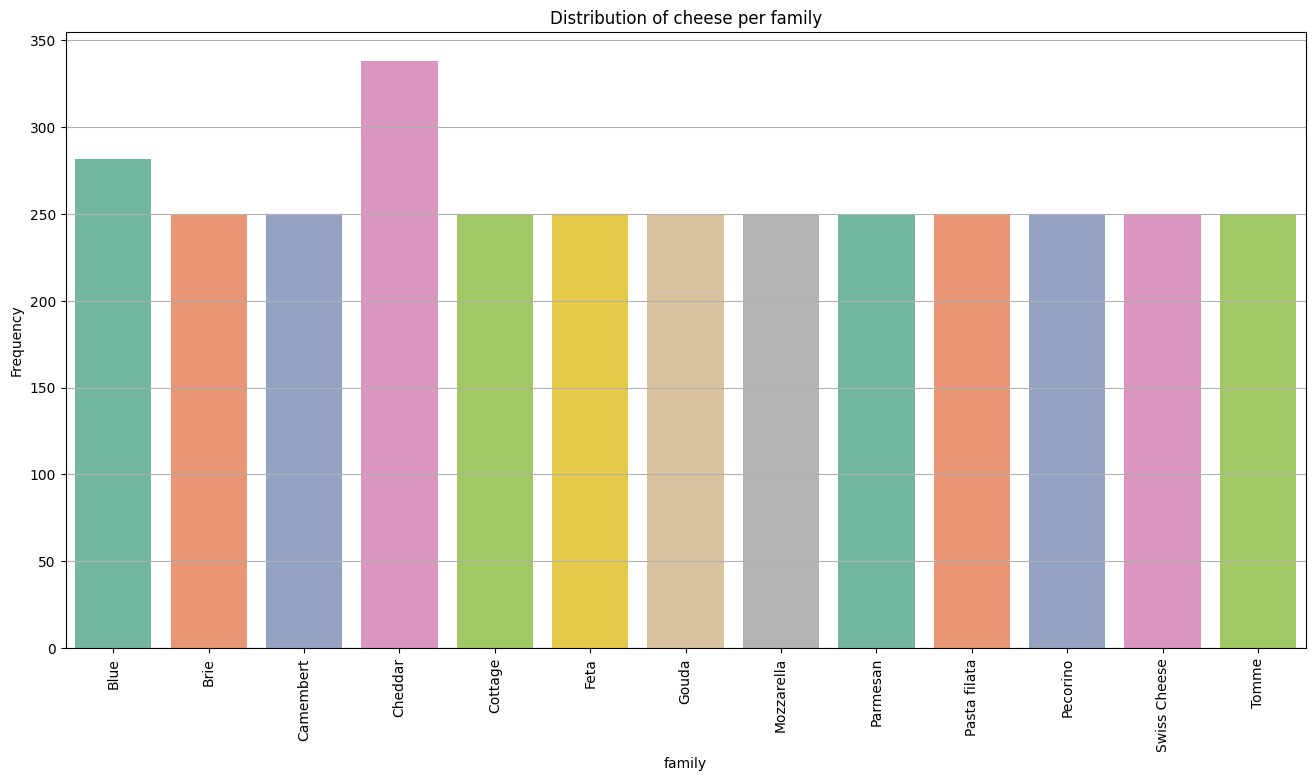

In [146]:
# การกระจายของ cheese ในแต่ละ family

Distribution_milk = df['family'].value_counts().sort_index()

plt.figure(figsize=(16, 8))
sns.barplot(x=Distribution_milk.index, y=Distribution_milk.values, palette='Set2')
plt.title("Distribution of cheese per family")
plt.xlabel('family')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(True, axis='y')
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'United States'),
  Text(1, 0, 'France'),
  Text(2, 0, 'Italy'),
  Text(3, 0, 'Australia'),
  Text(4, 0, 'Canada'),
  Text(5, 0, 'Ireland'),
  Text(6, 0, 'Netherlands'),
  Text(7, 0, 'England, Great Britain, United Kingdom'),
  Text(8, 0, 'United Kingdom'),
  Text(9, 0, 'England'),
  Text(10, 0, 'Spain'),
  Text(11, 0, 'Switzerland'),
  Text(12, 0, 'Germany'),
  Text(13, 0, 'India'),
  Text(14, 0, 'Scotland'),
  Text(15, 0, 'Mexico'),
  Text(16, 0, 'Canada, United States'),
  Text(17, 0, 'Portugal'),
  Text(18, 0, 'Greece'),
  Text(19, 0, 'Belgium')])

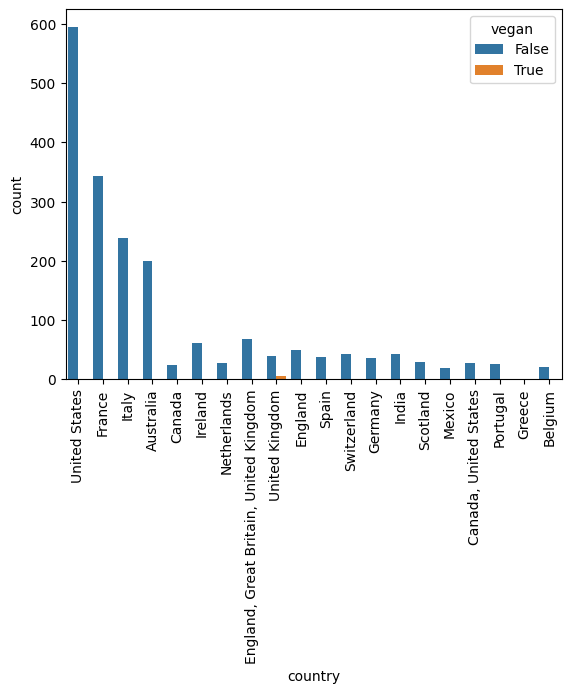

In [147]:
# ดูว่า vegan มีอยู่ในประเทศอะไรบ้าง

top_countries = df['country'].value_counts().head(20)

sns.countplot(x = df['country'], order = top_countries.index, hue = df['vegan'])
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'United States'),
  Text(1, 0, 'France'),
  Text(2, 0, 'Italy'),
  Text(3, 0, 'Australia'),
  Text(4, 0, 'Canada'),
  Text(5, 0, 'Ireland'),
  Text(6, 0, 'Netherlands'),
  Text(7, 0, 'England, Great Britain, United Kingdom'),
  Text(8, 0, 'United Kingdom'),
  Text(9, 0, 'England'),
  Text(10, 0, 'Spain'),
  Text(11, 0, 'Switzerland'),
  Text(12, 0, 'Germany'),
  Text(13, 0, 'India'),
  Text(14, 0, 'Scotland'),
  Text(15, 0, 'Mexico'),
  Text(16, 0, 'Canada, United States'),
  Text(17, 0, 'Portugal'),
  Text(18, 0, 'Greece'),
  Text(19, 0, 'Belgium')])

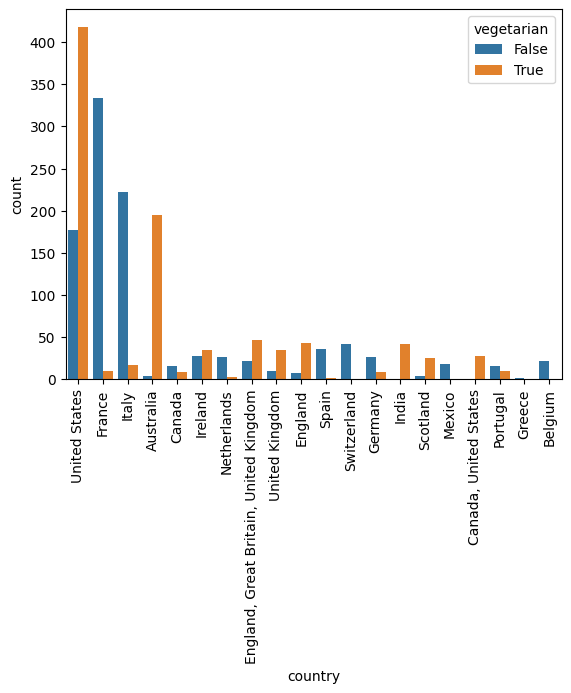

In [148]:
# ดูว่า vegeterian มีอยู่ในประเทศอะไรบ้าง

sns.countplot(x = df['country'], order = top_countries.index, hue = df['vegetarian'])
plt.xticks(rotation=90)

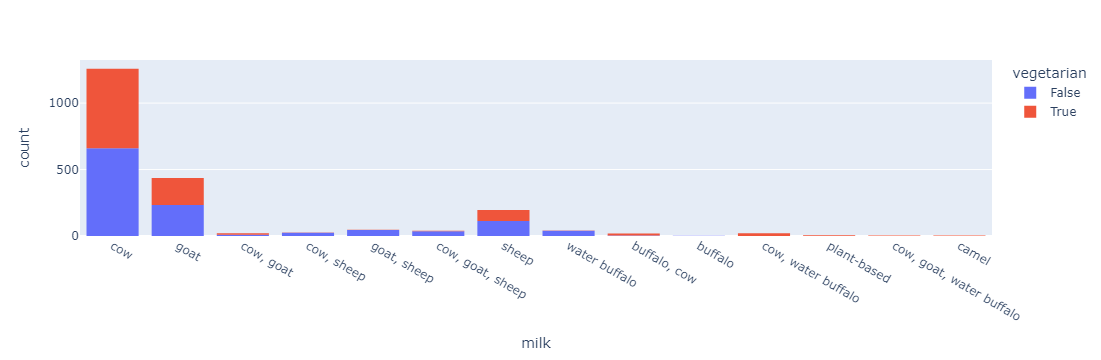

In [149]:
# จน. vegeterian ที่อยู่ในชนิดนมต่างๆ

fig = px.histogram(df, x="milk", color="vegetarian")
fig.update_layout(
    bargap=0.2
)
fig.show()

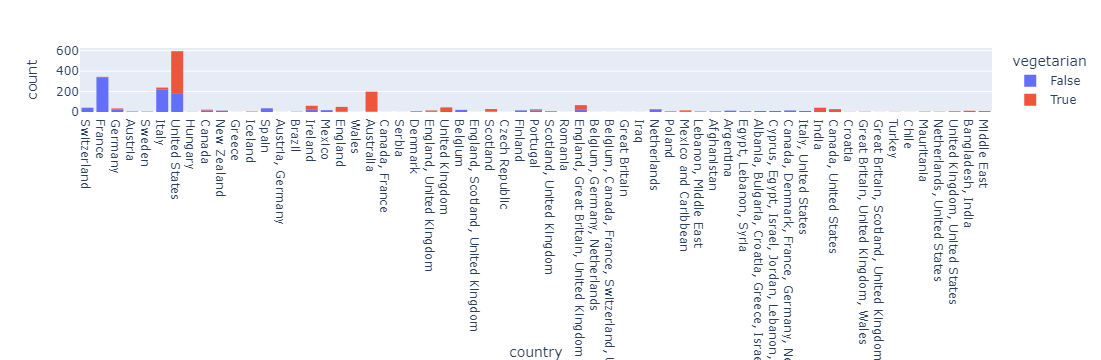

In [150]:
fig = px.histogram(df, x="country", color="vegetarian")
fig.update_layout(
    bargap=0.2
)
fig.show()

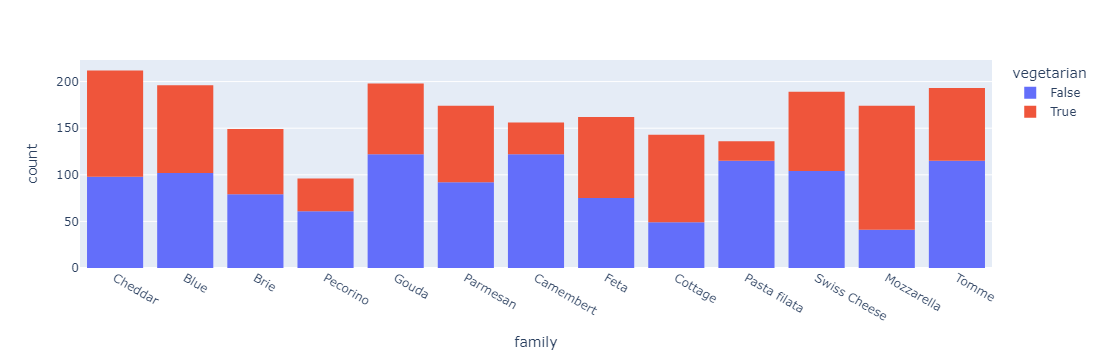

In [151]:
# ดูว่าในแต่ family มี vegetrian เป็นอย่างไรบ้าง

fig = px.histogram(df, x="family", color="vegetarian")
fig.update_layout(
    bargap=0.2
)
fig.show()

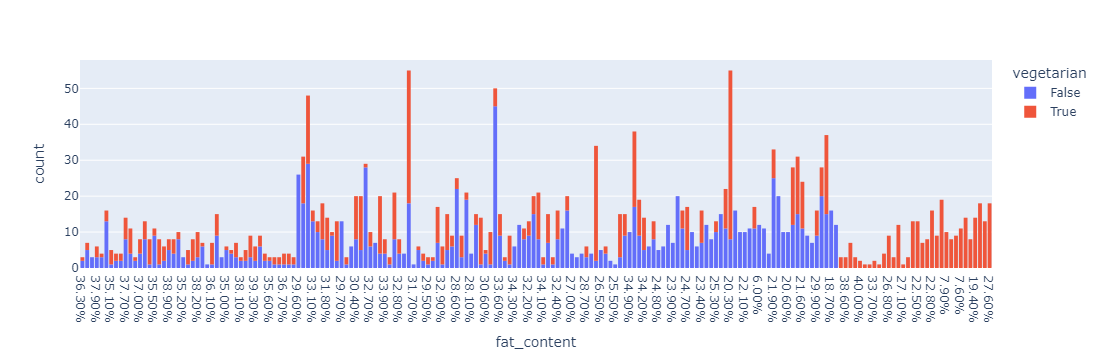

In [152]:
fig = px.histogram(df, x="fat_content", color="vegetarian")
fig.update_layout(
    bargap=0.2
)
fig.show()

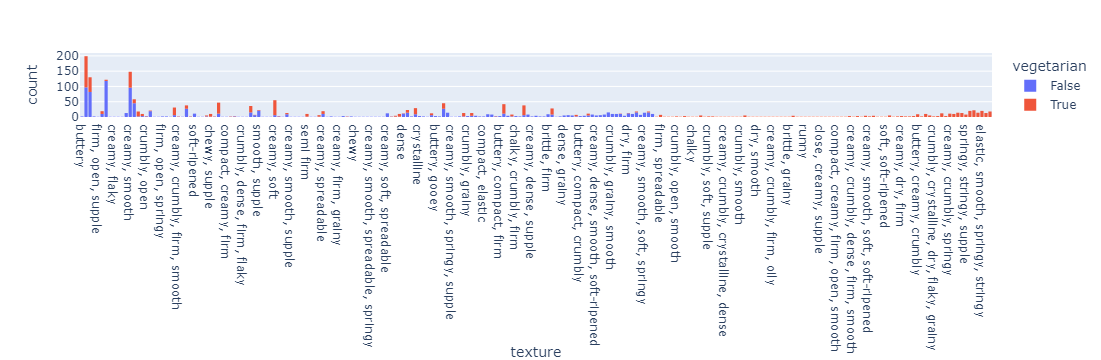

In [153]:
fig = px.histogram(df, x="texture", color="vegetarian")
fig.update_layout(
    bargap=0.2
)
fig.show()

### Cleaning Data

In [154]:
df.drop('url',axis=1,inplace=True)
df.drop('region',axis=1,inplace=True)
df.drop('synonyms',axis=1,inplace=True)
df.drop('alt_spellings',axis=1,inplace=True)
df.drop('producers',axis=1,inplace=True)
df.drop('calcium_content',axis=1,inplace=True)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3370 entries, 0 to 3369
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   cheese       3370 non-null   object
 1   milk         3292 non-null   object
 2   country      3334 non-null   object
 3   family       3370 non-null   object
 4   type         3344 non-null   object
 5   fat_content  3370 non-null   object
 6   texture      3208 non-null   object
 7   rind         2728 non-null   object
 8   color        3002 non-null   object
 9   flavor       3074 non-null   object
 10  aroma        2710 non-null   object
 11  vegetarian   2178 non-null   object
 12  vegan        2178 non-null   object
dtypes: object(13)
memory usage: 342.4+ KB


In [156]:
df.isnull().sum()

cheese            0
milk             78
country          36
family            0
type             26
fat_content       0
texture         162
rind            642
color           368
flavor          296
aroma           660
vegetarian     1192
vegan          1192
dtype: int64

In [157]:
df['fat_content'].unique()

array(['36.30%', '37.40%', '37.90%', '36.50%', '39.80%', '38.10%',
       '38.80%', '38.70%', '35.50%', '36.10%', '38.50%', '37.10%',
       '38.40%', '39.10%', '35.00%', '36.20%', '35.80%', '35.10%',
       '35.30%', '37.70%', '39.40%', '36.00%', '36.90%', '37.20%',
       '35.60%', '39.50%', '36.40%', '37.50%', '37.80%', '35.70%',
       '36.80%', '37.00%', '39.60%', '39.30%', '37.60%', '39.20%',
       '38.90%', '38.30%', '39.70%', '37.30%', '35.90%', '38.20%',
       '35.20%', '38.60%', '36.60%', '39.00%', '39.90%', '35.40%',
       '36.70%', '38.00%', '40.00%', '29.60%', '30.20%', '28.50%',
       '29.10%', '32.00%', '31.50%', '32.40%', '33.10%', '30.50%',
       '29.30%', '30.80%', '32.50%', '28.70%', '30.40%', '33.40%',
       '31.80%', '31.00%', '31.90%', '33.80%', '28.90%', '30.70%',
       '29.70%', '28.80%', '32.30%', '33.50%', '33.20%', '32.80%',
       '28.20%', '29.20%', '32.60%', '29.40%', '32.70%', '30.60%',
       '33.30%', '30.30%', '29.90%', '30.00%', '28.40%', '33.9

In [158]:
# เปลี่ยน fat_content จาก % เป็นช่วง LOW MEDIUM HIGH
# แปลงค่าเปอร์เซ็นต์เป็นตัวเลข
percentages = df['fat_content'].unique()
percentages = [float(p.strip('%')) for p in percentages]

# คำนวณค่าสูงสุดและต่ำสุด
min_value = min(percentages)
max_value = max(percentages)

# คำนวณช่วงสำหรับ High, Medium, Low
low_threshold = min_value + (max_value - min_value) / 3
medium_threshold = min_value + 2 * (max_value - min_value) / 3

min_value, low_threshold, medium_threshold, max_value

(4.1, 16.066666666666666, 28.03333333333333, 40.0)

In [159]:
df['fat_content'].dtype
print(low_threshold)
print(medium_threshold)

16.066666666666666
28.03333333333333


In [160]:
# แปลงค่าเปอร์เซ็นต์ในคอลัมน์เป็นตัวเลข
df['fat_content'] = df['fat_content'].str.rstrip('%').astype(float)

# ฟังก์ชันในการแปลงค่าเป็นช่วง Low, Medium, High
def categorize_fat_content(value):
    if value <= low_threshold:
        return 'Low'
    elif value <= medium_threshold:
        return 'Medium'
    else:
        return 'High'

# ใช้ฟังก์ชันเพื่อแปลงค่าคอลัมน์ 'fat_content'
df['fat_content'] = df['fat_content'].apply(categorize_fat_content)

df

,cheese,milk,country,family,type,fat_content,texture,rind,color,flavor,aroma,vegetarian,vegan
0,Aarewasser,cow,Switzerland,Cheddar,semi-soft,High,buttery,washed,yellow,sweet,buttery,False,False
1,Abbaye de Belloc,sheep,France,Cheddar,"semi-hard, artisan",High,"creamy, dense, firm",natural,yellow,burnt caramel,lanoline,True,False
2,Abbot’s Gold,cow,"England, Great Britain, United Kingdom",Cheddar,semi-hard,High,"creamy, crumbly, dense, semi firm",natural,pale yellow,"mild, sweet, tangy",aromatic,True,False
3,Abondance,cow,France,Cheddar,"semi-hard, artisan",High,creamy,natural,pale yellow,nutty,"buttery, fruity",False,False
4,Acorn,sheep,United Kingdom,Cheddar,"hard, artisan",High,"crumbly, firm",NaN,NaN,"burnt caramel, citrusy, herbaceous",fruity,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3365,Mascares,"goat, sheep",France,Tomme,"fresh soft, artisan",High,smooth,leaf wrapped,white,NaN,"earthy, floral",False,False
3366,Maggie's Round,cow,United States,Tomme,"semi-hard, artisan",High,"firm, smooth",natural,blue-grey,"buttery, citrusy, nutty, sharp","earthy, fruity, herbal",True,False
3367,Milawa Goats Tomme,goat,Australia,Tomme,semi-hard,Medium,"creamy, crumbly, dense",natural,yellow,"savory, spicy",earthy,True,False
3368,Pizy,cow,Canada,Tomme,"soft, artisan, soft-ripened",Medium,"creamy, smooth, soft",bloomy,ivory,"bitter, buttery, mild, milky, salty",mushroom,NaN,NaN


In [161]:
df['milk'].value_counts()

milk
cow                                1912
goat                                610
sheep                               368
goat, sheep                          92
cow, goat, sheep                     82
water buffalo                        50
cow, goat                            38
cow, sheep                           35
buffalo, cow                         21
cow, water buffalo                   21
cow, goat, sheep, water buffalo      15
donkey                               12
cow, yak                              7
plant-based                           6
yak                                   6
buffalo                               5
cow, goat, water buffalo              5
camel                                 4
buffalo, cow, sheep                   1
moose                                 1
goat, yak                             1
Name: count, dtype: int64

In [162]:
df.isnull().sum()

cheese            0
milk             78
country          36
family            0
type             26
fat_content       0
texture         162
rind            642
color           368
flavor          296
aroma           660
vegetarian     1192
vegan          1192
dtype: int64

In [163]:
# นับจำนวนค่าว่างในแต่ละแถว
nan_count = df.isna().sum(axis=1)

# เลือกแถวที่มีค่าว่างมากกว่า 5 ค่า
rows_with_nan = df[nan_count > 5]

# แสดงจำนวนแถวที่ตรงตามเงื่อนไข
len(rows_with_nan)

15

In [164]:
rows_with_nan.head()

,cheese,milk,country,family,type,fat_content,texture,rind,color,flavor,aroma,vegetarian,vegan
40,Aragon,NaN,Spain,Cheddar,NaN,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,Ardsallagh Soft Goat's Cheese,NaN,NaN,Cheddar,NaN,High,NaN,natural,white,NaN,NaN,True,False
46,Assa,goat,United States,Cheddar,NaN,High,NaN,natural,NaN,NaN,NaN,NaN,NaN
94,Bûchette à la Sarriette,goat,France,Cheddar,"soft, processed",High,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,Cornish Kern,NaN,NaN,Cheddar,NaN,High,NaN,washed,NaN,NaN,NaN,True,False


In [165]:
df = df.drop(index=df[nan_count > 5].index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3355 entries, 0 to 3369
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   cheese       3355 non-null   object
 1   milk         3286 non-null   object
 2   country      3328 non-null   object
 3   family       3355 non-null   object
 4   type         3337 non-null   object
 5   fat_content  3355 non-null   object
 6   texture      3202 non-null   object
 7   rind         2724 non-null   object
 8   color        3000 non-null   object
 9   flavor       3073 non-null   object
 10  aroma        2710 non-null   object
 11  vegetarian   2174 non-null   object
 12  vegan        2174 non-null   object
dtypes: object(13)
memory usage: 367.0+ KB


In [166]:
#ทำการเติมแบบแบ่งสัดส่วน most_frequent
# แบ่งสัดส่วนในการเติมค่า NaN

# ทำการเติมแบบแบ่งสัดส่วน most_frequent
for col in df.select_dtypes("object").columns:
    # คำนวณการแจกแจงของค่าที่มีในคอลัมน์
    value_counts = df[col].value_counts(normalize=True)
    
    # สุ่มค่าเพื่อเติม NaN ตามสัดส่วนที่ได้
    imputed_values = np.random.choice(value_counts.index, 
                                       size=df[col].isna().sum(), 
                                       p=value_counts.values)
    
    # เติมค่า NaN ใน DataFrame
    df.loc[df[col].isna(), col] = imputed_values

# แสดง DataFrame
df

,cheese,milk,country,family,type,fat_content,texture,rind,color,flavor,aroma,vegetarian,vegan
0,Aarewasser,cow,Switzerland,Cheddar,semi-soft,High,buttery,washed,yellow,sweet,buttery,False,False
1,Abbaye de Belloc,sheep,France,Cheddar,"semi-hard, artisan",High,"creamy, dense, firm",natural,yellow,burnt caramel,lanoline,True,False
2,Abbot’s Gold,cow,"England, Great Britain, United Kingdom",Cheddar,semi-hard,High,"creamy, crumbly, dense, semi firm",natural,pale yellow,"mild, sweet, tangy",aromatic,True,False
3,Abondance,cow,France,Cheddar,"semi-hard, artisan",High,creamy,natural,pale yellow,nutty,"buttery, fruity",False,False
4,Acorn,sheep,United Kingdom,Cheddar,"hard, artisan",High,"crumbly, firm",natural,white,"burnt caramel, citrusy, herbaceous",fruity,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3365,Mascares,"goat, sheep",France,Tomme,"fresh soft, artisan",High,smooth,leaf wrapped,white,tangy,"earthy, floral",False,False
3366,Maggie's Round,cow,United States,Tomme,"semi-hard, artisan",High,"firm, smooth",natural,blue-grey,"buttery, citrusy, nutty, sharp","earthy, fruity, herbal",True,False
3367,Milawa Goats Tomme,goat,Australia,Tomme,semi-hard,Medium,"creamy, crumbly, dense",natural,yellow,"savory, spicy",earthy,True,False
3368,Pizy,cow,Canada,Tomme,"soft, artisan, soft-ripened",Medium,"creamy, smooth, soft",bloomy,ivory,"bitter, buttery, mild, milky, salty",mushroom,False,False


In [167]:
df.duplicated().count()

3355

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3355 entries, 0 to 3369
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   cheese       3355 non-null   object
 1   milk         3355 non-null   object
 2   country      3355 non-null   object
 3   family       3355 non-null   object
 4   type         3355 non-null   object
 5   fat_content  3355 non-null   object
 6   texture      3355 non-null   object
 7   rind         3355 non-null   object
 8   color        3355 non-null   object
 9   flavor       3355 non-null   object
 10  aroma        3355 non-null   object
 11  vegetarian   3355 non-null   object
 12  vegan        3355 non-null   object
dtypes: object(13)
memory usage: 367.0+ KB


In [169]:
df["family"].unique()

array(['Cheddar', 'Blue', 'Brie', 'Pecorino', 'Gouda', 'Parmesan',
       'Camembert', 'Feta', 'Cottage', 'Pasta filata', 'Swiss Cheese',
       'Mozzarella', 'Tomme'], dtype=object)

In [170]:
df["vegetarian"].value_counts()

vegetarian
False    1809
True     1546
Name: count, dtype: int64

In [171]:
df

,cheese,milk,country,family,type,fat_content,texture,rind,color,flavor,aroma,vegetarian,vegan
0,Aarewasser,cow,Switzerland,Cheddar,semi-soft,High,buttery,washed,yellow,sweet,buttery,False,False
1,Abbaye de Belloc,sheep,France,Cheddar,"semi-hard, artisan",High,"creamy, dense, firm",natural,yellow,burnt caramel,lanoline,True,False
2,Abbot’s Gold,cow,"England, Great Britain, United Kingdom",Cheddar,semi-hard,High,"creamy, crumbly, dense, semi firm",natural,pale yellow,"mild, sweet, tangy",aromatic,True,False
3,Abondance,cow,France,Cheddar,"semi-hard, artisan",High,creamy,natural,pale yellow,nutty,"buttery, fruity",False,False
4,Acorn,sheep,United Kingdom,Cheddar,"hard, artisan",High,"crumbly, firm",natural,white,"burnt caramel, citrusy, herbaceous",fruity,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3365,Mascares,"goat, sheep",France,Tomme,"fresh soft, artisan",High,smooth,leaf wrapped,white,tangy,"earthy, floral",False,False
3366,Maggie's Round,cow,United States,Tomme,"semi-hard, artisan",High,"firm, smooth",natural,blue-grey,"buttery, citrusy, nutty, sharp","earthy, fruity, herbal",True,False
3367,Milawa Goats Tomme,goat,Australia,Tomme,semi-hard,Medium,"creamy, crumbly, dense",natural,yellow,"savory, spicy",earthy,True,False
3368,Pizy,cow,Canada,Tomme,"soft, artisan, soft-ripened",Medium,"creamy, smooth, soft",bloomy,ivory,"bitter, buttery, mild, milky, salty",mushroom,False,False


In [172]:
df.to_csv('cheese_before_encode_5.csv', index=False)

In [173]:
from sklearn import preprocessing
# สร้าง dictionary สำหรับการเก็บ mapping ที่แน่นอน
static_mapping = {}


# แปลงทุกคอลัมน์ใน DataFrame ให้เป็น string
for col in df.columns:
    # แปลงคอลัมน์ boolean เป็น string และคอลัมน์อื่น ๆ เป็น string ด้วย
    df[col] = df[col].astype(str)
    
    # ถ้ายังไม่มี mapping สำหรับคอลัมน์นี้ ให้สร้างใหม่
    if col not in static_mapping:
        le = preprocessing.LabelEncoder()
        le.fit(df[col])
        static_mapping[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# ใช้ static_mapping ในการเข้ารหัส DataFrame
for col, map_dict in static_mapping.items():
    df[col] = df[col].map(map_dict)

# แสดงผลลัพธ์ DataFrame หลังจากการแปลง
print(static_mapping)
print(df)

# แสดง mapping ที่ถูกตรึง
for col, map_dict in static_mapping.items():
    print(f"Static Mapping for {col}: {map_dict}")

{'cheese': {'ADL Brick Cheese': 0, 'ADL Mild Cheddar': 1, 'Aarewasser': 2, 'Abbaye de Belloc': 3, 'Abbaye de Belval': 4, 'Abbaye de Citeaux': 5, 'Abbaye de Tamié': 6, 'Abbaye de Timadeuc': 7, 'Abbaye du Mont des Cats': 8, 'Abbot’s Gold': 9, 'Abertam': 10, 'Abondance': 11, 'Acapella': 12, 'Accasciato': 13, 'Ackawi': 14, 'Acorn': 15, 'Adelost': 16, 'Affidelice au Chablis': 17, 'Affineur Walo Rotwein Sennechäs': 18, "Afuega'l Pitu": 19, 'Aged British Cheddar': 20, 'Aged Cashew & Blue Green Algae Cheese': 21, 'Aged Cashew & Brazil Nut Cheese': 22, 'Aged Cashew & Dulse Cheese': 23, 'Aged Cashew & Hemp Seed Cheese': 24, 'Aged Cashew Nut & Kale Cheese': 25, 'Aged Cashew Nut Cheese': 26, 'Aged Cheddar': 27, 'Aged Chelsea': 28, 'Aged Gouda': 29, 'Aggiano': 30, 'Ailsa Craig': 31, 'Airedale': 32, 'Aisy Cendre': 33, 'Alex James Co. No 1 Cheddar': 34, 'Alex James Co. No 2 Blue Monday': 35, "Alex James Co. No 4 Goats'": 36, 'Alex James Co. No 5 Grunge': 37, 'Alisia-Victoria': 38, 'Allgauer Emmentale

In [174]:
df

,cheese,milk,country,family,type,fat_content,texture,rind,color,flavor,aroma,vegetarian,vegan
0,2,4,72,3,47,0,11,10,16,596,49,0,0
1,3,18,35,3,39,0,114,7,16,69,226,1,0
2,9,4,31,3,38,0,99,7,11,470,0,1,0
3,11,4,35,3,39,0,93,7,11,488,57,0,0
4,15,18,74,3,21,0,199,7,15,71,158,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3365,659,14,35,12,14,0,279,5,15,598,89,0,0
3366,635,4,77,12,39,0,259,7,1,92,93,1,0
3367,693,13,4,12,38,2,97,7,16,555,87,1,0
3368,873,4,14,12,67,2,161,2,8,56,250,0,0


In [175]:
df.shape

(3355, 13)

In [176]:
df.to_csv('cheese_encode_5.csv', index=False)

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3355 entries, 0 to 3369
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   cheese       3355 non-null   int32
 1   milk         3355 non-null   int32
 2   country      3355 non-null   int32
 3   family       3355 non-null   int32
 4   type         3355 non-null   int32
 5   fat_content  3355 non-null   int32
 6   texture      3355 non-null   int32
 7   rind         3355 non-null   int32
 8   color        3355 non-null   int32
 9   flavor       3355 non-null   int32
 10  aroma        3355 non-null   int32
 11  vegetarian   3355 non-null   int32
 12  vegan        3355 non-null   int32
dtypes: int32(13)
memory usage: 196.6 KB


In [178]:
df.drop('cheese',axis=1,inplace=True)

<Axes: >

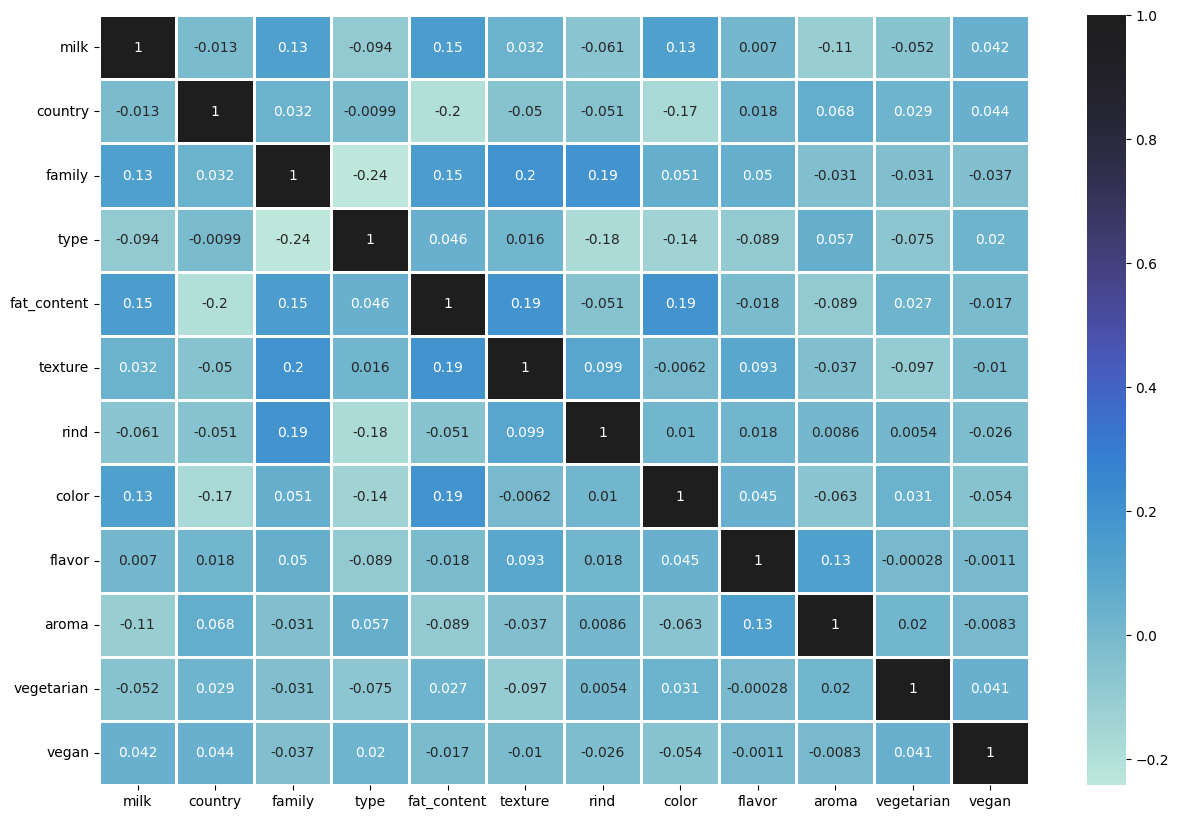

In [179]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cbar='virdis',linecolor='white',linewidths=0.9,center=True)

In [182]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Read data from the CSV file
train_data = pd.read_csv('cheese_encode_5.csv')
train_data = train_data.drop(columns='cheese')

# Assign features (X) and target (y)
X = train_data.drop(columns='family')  # All columns except 'family' are features
y = train_data['family']  # 'family' is the target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_test)
print(y_test)

# Train the Random Forest model
random_forest = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=20, min_samples_split=5)
random_forest.fit(X_train, y_train)

# Predict the test set results
predictions = random_forest.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Generate and print the classification report
report = classification_report(y_test, predictions)
print("Classification Report:\n", report)

# Print the first 50 predictions
print(predictions[:50])

      milk  country  type  fat_content  texture  rind  color  flavor  aroma  \
3250     4       77    39            2      250     7      4      87    127   
596      4       77    48            0      147     7     11     164    100   
2236    13       35    62            1      160     3     15      38    105   
1064    18       52    21            2      264     1      8     395    214   
315      4       77    21            0      250     9     11     592    285   
...    ...      ...   ...          ...      ...   ...    ...     ...    ...   
2313     4       35    74            1      171    10     11     280    122   
2020    13       67    14            2      174     9     15     423    125   
509      4       52    47            0      250     7      4      62    181   
644     13       35    62            0      160     5     15     583      0   
597      4       77    52            0       93     7      4     318    268   

      vegetarian  vegan  
3250           1      0  